In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. LOAD DATASET

In [2]:
customers = pd.read_csv('customers.csv')
sellers = pd.read_csv('sellers.csv')
order_items = pd.read_csv('order_items.csv')
payments = pd.read_csv('payments.csv')
orders = pd.read_csv('orders.csv')
products = pd.read_csv('products.csv')

# 2. PREPROCESSING
# Convert date columns to datetime objects

In [3]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
order_items['shipping_limit_date'] = pd.to_datetime(order_items['shipping_limit_date'])

# Merge datasets for combined analysis

In [4]:
order_details = pd.merge(order_items, orders, on='order_id')
order_details = pd.merge(order_details, products, on='product_id')
order_details = pd.merge(order_details, customers, on='customer_id')

# BASIC PROBLEMS
# ==========================================

# 1. Unique cities

In [5]:

unique_cities = customers['customer_city'].unique()
unique_cities.sort()
print(unique_cities)

['abadia dos dourados' 'abadiania' 'abaete' ... 'zacarias' 'ze doca'
 'zortea']


# 2. Orders in 2017

In [6]:
orders_2017 = orders[orders['order_purchase_timestamp'].dt.year == 2017].shape[0]
print(orders_2017)

45101


# 3. Total sales per category

In [7]:
sales_per_cat = order_details.groupby('product category')['price'].sum().sort_values(ascending=False)
print(sales_per_cat)

product category
HEALTH BEAUTY                  1258681.34
Watches present                1205005.68
bed table bath                 1036988.68
sport leisure                   988048.97
computer accessories            911954.32
                                  ...    
flowers                           1110.04
House Comfort 2                    760.27
cds music dvds                     730.00
Fashion Children's Clothing        569.85
insurance and services             283.29
Name: price, Length: 73, dtype: float64


# 4. % of orders paid in installments

In [8]:
pct_installments = (payments[payments['payment_installments'] > 1].shape[0] / payments.shape[0]) * 100
print(pct_installments)

49.41763086460158


# 5. Customers per state

In [9]:
cust_per_state = customers['customer_state'].value_counts()
print(cust_per_state)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: count, dtype: int64


# ==========================================
# INTERMEDIATE PROBLEMS
# ==========================================

# 1. Orders per month in 2018

In [10]:
orders_2018 = orders[orders['order_purchase_timestamp'].dt.year == 2018]
orders_per_month_2018 = orders_2018.groupby(orders_2018['order_purchase_timestamp'].dt.month).size()
print(orders_per_month_2018)

order_purchase_timestamp
1     7269
2     6728
3     7211
4     6939
5     6873
6     6167
7     6292
8     6512
9       16
10       4
dtype: int64


# 2. Average products per order by city

In [11]:
avg_items_city = order_details.groupby(['customer_city', 'order_id']).size().groupby('customer_city').mean().sort_values(ascending=False)

print(avg_items_city)

customer_city
padre carvalho    7.0
celso ramos       6.5
datas             6.0
candido godoi     6.0
matias olimpio    5.0
                 ... 
jatauba           1.0
jatoba            1.0
jaua              1.0
jaupaci           1.0
jardim            1.0
Length: 4110, dtype: float64


# 3. % Revenue contribution by category

In [12]:
total_revenue = order_items['price'].sum()
cat_revenue_pct = (sales_per_cat / total_revenue) * 100
print(total_revenue)
print(cat_revenue_pct)

13591643.700000003
product category
HEALTH BEAUTY                  9.260700
Watches present                8.865783
bed table bath                 7.629605
sport leisure                  7.269533
computer accessories           6.709669
                                 ...   
flowers                        0.008167
House Comfort 2                0.005594
cds music dvds                 0.005371
Fashion Children's Clothing    0.004193
insurance and services         0.002084
Name: price, Length: 73, dtype: float64


# 4. Correlation: Price vs Purchases

In [13]:
prod_stats = order_items.groupby('product_id').agg({'price': 'mean', 'order_id': 'count'})
correlation = prod_stats['price'].corr(prod_stats['order_id'])
print(prod_stats)
print(correlation)

                                   price  order_id
product_id                                        
00066f42aeeb9f3007548bb9d3f33c38  101.65         1
00088930e925c41fd95ebfe695fd2655  129.90         1
0009406fd7479715e4bef61dd91f2462  229.00         1
000b8f95fcb9e0096488278317764d19   58.90         2
000d9be29b5207b54e86aa1b1ac54872  199.00         1
...                                  ...       ...
fff6177642830a9a94a0f2cba5e476d1  114.99         2
fff81cc3158d2725c0655ab9ba0f712c   90.00         1
fff9553ac224cec9d15d49f5a263411f   32.00         1
fffdb2d0ec8d6a61f0a0a0db3f25b441   33.99         5
fffe9eeff12fcbd74a2f2b007dde0c58  249.99         1

[32951 rows x 2 columns]
-0.032139862680945167


# 5. Seller Revenue Ranking

In [14]:
seller_rev = order_items.groupby('seller_id')['price'].sum().reset_index()
seller_rev['total_revenue']=seller_rev['price'].round(2)
seller_rev['revenue_rank']=seller_rev['total_revenue'].rank(ascending=False,
method='min').astype(int)
seller_rev=seller_rev.sort_values(by='revenue_rank').reset_index(drop=True)
print(seller_rev)


                             seller_id      price  total_revenue  revenue_rank
0     4869f7a5dfa277a7dca6462dcf3b52b2  229472.63      229472.63             1
1     53243585a1d6dc2643021fd1853d8905  222776.05      222776.05             2
2     4a3ca9315b744ce9f8e9374361493884  200472.92      200472.92             3
3     fa1c13f2614d7b5c4749cbc52fecda94  194042.03      194042.03             4
4     7c67e1448b00f6e969d365cea6b010ab  187923.89      187923.89             5
...                                ...        ...            ...           ...
3090  34aefe746cd81b7f3b23253ea28bef39       8.00           8.00          3091
3091  702835e4b785b67a084280efca355756       7.60           7.60          3092
3092  1fa2d3def6adfa70e58c276bb64fe5bb       6.90           6.90          3093
3093  77128dec4bec4878c37ab7d6169d6f26       6.50           6.50          3094
3094  cf6f6bc4df3999b9c6440f124fb2f687       3.50           3.50          3095

[3095 rows x 4 columns]


# ADVANCED PROBLEMS
# ==========================================

# 1. Moving Average of Order Value

In [15]:
import pandas as pd
payments = pd.read_csv('payments.csv')
orders = pd.read_csv('orders.csv')
customers = pd.read_csv('customers.csv')

order_payments = payments.groupby('order_id')['payment_value'].sum().reset_index()
df = orders.merge(order_payments, on='order_id') \
.merge(customers[['customer_id', 'customer_unique_id']], on='customer_id')
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df = df.sort_values(['customer_unique_id', 'order_purchase_timestamp'])
df['moving_avg'] = df.groupby('customer_unique_id')['payment_value'] \
.transform(lambda x: x.rolling(window=3, min_periods=1).mean())
result = df[['customer_unique_id', 'order_id', 'order_purchase_timestamp', 'payment_value', 'moving_avg']]
print(result.head())

                     customer_unique_id                          order_id  \
52797  0000366f3b9a7992bf8c76cfdf3221e2  e22acc9c116caa3f2b7121bbb380d08e   
73888  0000b849f77a49e4a4ce2b2a4ca5be3f  3594e05a005ac4d06a72673270ef9ec9   
26460  0000f46a3911fa3c0805444483337064  b33ec3b699337181488304f362a6b734   
98492  0000f6ccb0745a6a4b88665a16c9f078  41272756ecddd9a9ed0180413cc22fb6   
41563  0004aac84e0df4da2b147fca70cf8255  d957021f1127559cd947b62533f484f7   

      order_purchase_timestamp  payment_value  moving_avg  
52797      2018-05-10 10:56:27         141.90      141.90  
73888      2018-05-07 11:11:27          27.19       27.19  
26460      2017-03-10 21:05:03          86.22       86.22  
98492      2017-10-12 20:29:41          43.62       43.62  
41563      2017-11-14 19:45:42         196.89      196.89  


# 2. Cumulative Sales per Month per Year

In [16]:
order_payments = payments.groupby('order_id')['payment_value'].sum().reset_index()
df = pd.merge(orders[['order_id', 'order_purchase_timestamp']], order_payments, on='order_id')
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['year'] = df['order_purchase_timestamp'].dt.year
df['month'] = df['order_purchase_timestamp'].dt.month
monthly_sales = df.groupby(['year', 'month'])['payment_value'].sum().reset_index()
monthly_sales = monthly_sales.sort_values(['year', 'month'])
monthly_sales['cumulative_sales'] = monthly_sales.groupby('year')['payment_value'].cumsum()
print(monthly_sales)

    year  month  payment_value  cumulative_sales
0   2016      9         252.24            252.24
1   2016     10       59090.48          59342.72
2   2016     12          19.62          59362.34
3   2017      1      138488.04         138488.04
4   2017      2      291908.01         430396.05
5   2017      3      449863.60         880259.65
6   2017      4      417788.03        1298047.68
7   2017      5      592918.82        1890966.50
8   2017      6      511276.38        2402242.88
9   2017      7      592382.92        2994625.80
10  2017      8      674396.32        3669022.12
11  2017      9      727762.45        4396784.57
12  2017     10      779677.88        5176462.45
13  2017     11     1194882.80        6371345.25
14  2017     12      878401.48        7249746.73
15  2018      1     1115004.18        1115004.18
16  2018      2      992463.34        2107467.52
17  2018      3     1159652.12        3267119.64
18  2018      4     1160785.48        4427905.12
19  2018      5     

In [17]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
order_items['shipping_limit_date'] = pd.to_datetime(order_items['shipping_limit_date'])

In [18]:
order_details = pd.merge(order_items, orders, on='order_id')
order_details = pd.merge(order_details, products, on='product_id')
order_details = pd.merge(order_details, customers, on='customer_id')

# 3. Retention Rate (6 Months)

In [19]:
df =pd.merge(orders[['customer_id','order_purchase_timestamp']],
             customers[['customer_id','customer_unique_id']],on='customer_id')
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
first_purchases = df.groupby('customer_unique_id')['order_purchase_timestamp'].min().reset_index()
first_purchases.rename(columns={'order_purchase_timestamp': 'first_purchase_date'}, inplace=True)
df = pd.merge(df, first_purchases, on='customer_unique_id')
df['days_since_first'] = (df['order_purchase_timestamp'] - df['first_purchase_date']).dt.days
retained_mask = (df['days_since_first']>0)&(df['days_since_first']<=180)
retained_customers_count=df[retained_mask]['customer_unique_id'].nunique()
total_customers_count=df['customer_unique_id'].nunique()
retention_rate=(retained_customers_count/total_customers_count)*100
print(f"Total Unique Customers:{total_customers_count}")
print(f"Retained(repeat within 6 months):{retained_customers_count}")
print(f"Retention Rate:{retention_rate:.2f}%")

Total Unique Customers:96096
Retained(repeat within 6 months):1608
Retention Rate:1.67%


# 4. Top 3 Customers per Year

In [20]:

orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['purchase_year'] = orders['order_purchase_timestamp'].dt.year
df = orders.merge(payments, on='order_id').merge(customers, on='customer_id')
spending = df.groupby(['purchase_year', 'customer_unique_id'])['payment_value'].sum().reset_index()
spending['rank'] = spending.groupby('purchase_year')['payment_value'] \
                           .rank(ascending=False, method='first').astype(int)
top_3 = spending[spending['rank'] <= 3].sort_values(['purchase_year', 'rank'])
print(top_3[['purchase_year', 'rank', 'customer_unique_id', 'payment_value']])

       purchase_year  rank                customer_unique_id  payment_value
319             2016     1  fdaa290acb9eeacb66fa7f979baa6803        1423.55
145             2016     2  753bc5d6efa9e49a03e34cf521a9e124        1400.74
234             2016     3  b92a2e5e8a6eabcc80882c7d68b2c70b        1227.78
2075            2017     1  0a0a92112bd4c708ca5fde585afaa872       13664.08
37662           2017     2  da122df9eeddfedc1dc1f5349a1a690c        7571.63
38033           2017     3  dc4802a71eae9be1dd28f5d788ceb526        6929.31
58553           2018     1  46450c74a0d8c5ca9395da1daac6c120        9553.02
68456           2018     2  763c8b1c9c68a0229c42c9fc6f662b93        7274.88
58410           2018     3  459bef486812aa25204be022145caa62        6922.21


# VISUALIZATIONS
# ==========================================

# Setup plot style

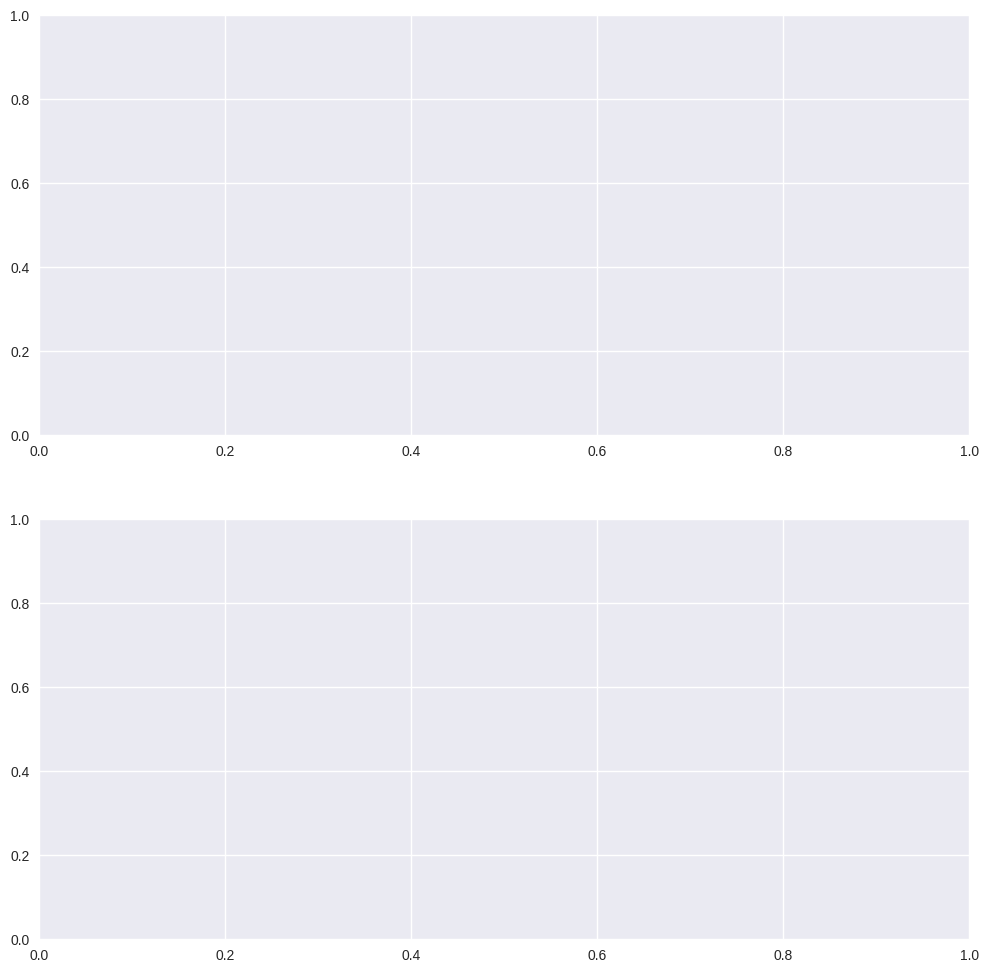

In [21]:
plt.style.use('seaborn-v0_8')
fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# Plot 1: Monthly Orders in 2018

In [22]:
orders_per_month_2018.plot(kind='bar', ax=axes[0], color='teal')
axes[0].set_title('Total Orders per Month (2018)', fontsize=14)
axes[0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct'], rotation=0)

[Text(0, 0, 'Jan'),
 Text(1, 0, 'Feb'),
 Text(2, 0, 'Mar'),
 Text(3, 0, 'Apr'),
 Text(4, 0, 'May'),
 Text(5, 0, 'Jun'),
 Text(6, 0, 'Jul'),
 Text(7, 0, 'Aug'),
 Text(8, 0, 'Sep'),
 Text(9, 0, 'Oct')]

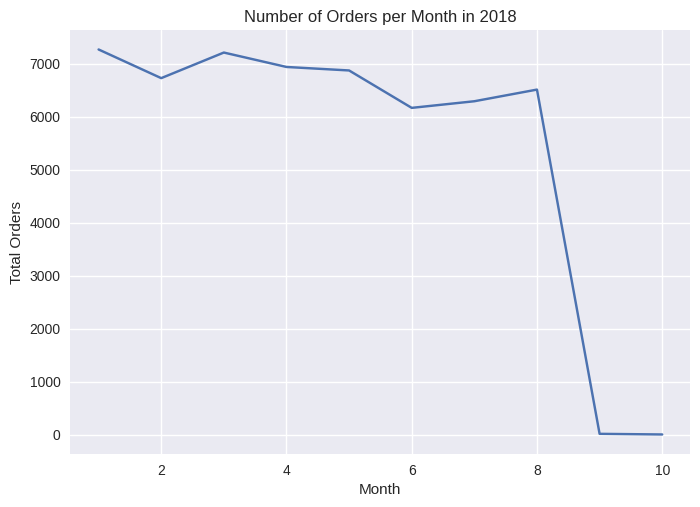

In [23]:
orders_2018 = orders[orders['order_purchase_timestamp'].dt.year == 2018]
monthly_orders_2018 = orders_2018.groupby(orders_2018['order_purchase_timestamp'].dt.month)['order_id'].nunique()

plt.figure()
plt.plot(monthly_orders_2018.index, monthly_orders_2018.values)
plt.title('Number of Orders per Month in 2018')
plt.xlabel('Month')
plt.ylabel('Total Orders')
plt.show()


# Rename the column in the products DataFrame before merging

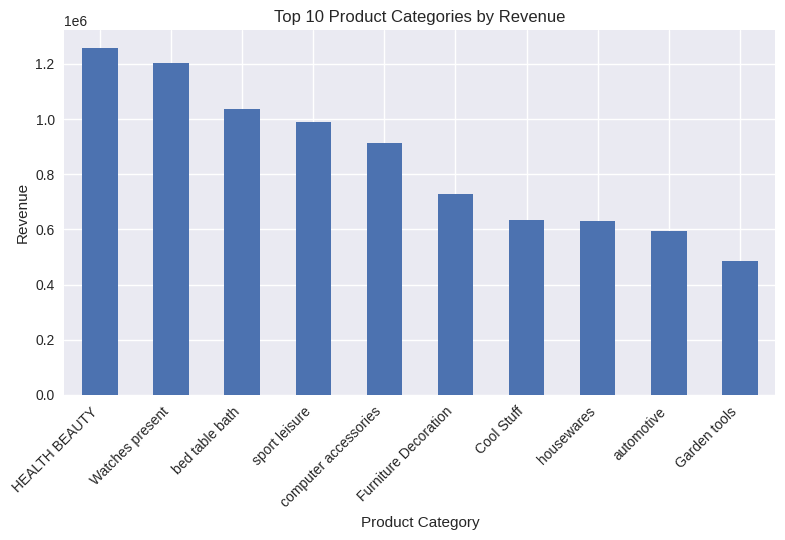

In [24]:
products.rename(columns={'product category': 'product_category_name'}, inplace=True)

merged = order_items.merge(products, on='product_id', how='left')

category_revenue = merged.groupby('product_category_name')['price'].sum().sort_values(ascending=False).head(10)

plt.figure()
category_revenue.plot(kind='bar')
plt.title('Top 10 Product Categories by Revenue')
plt.xlabel('Product Category')
plt.ylabel('Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

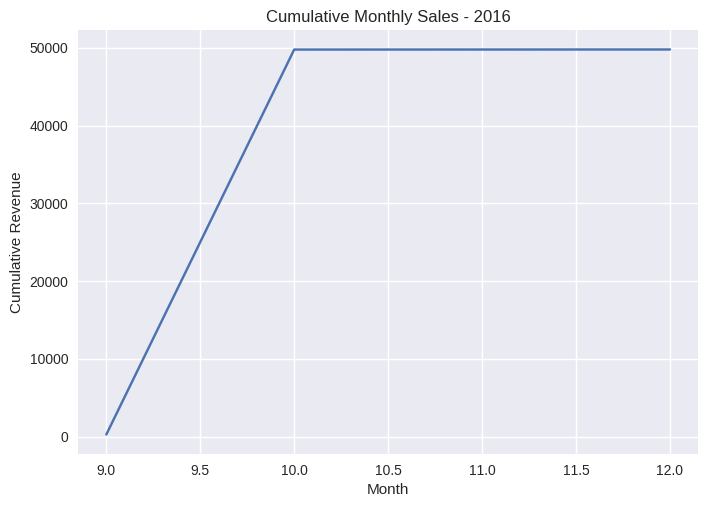

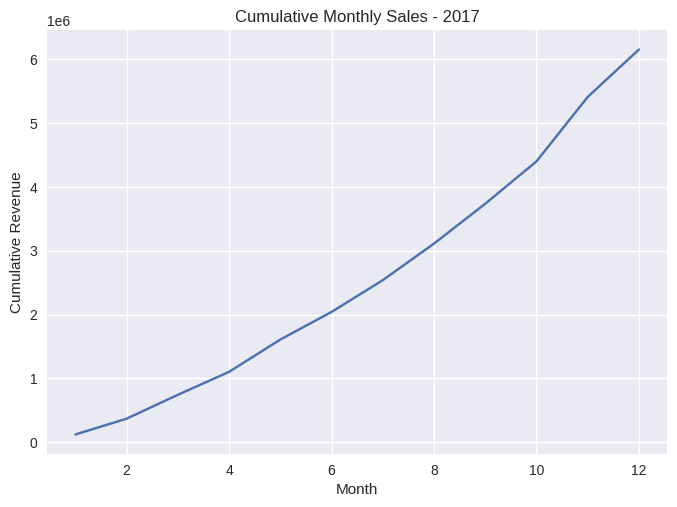

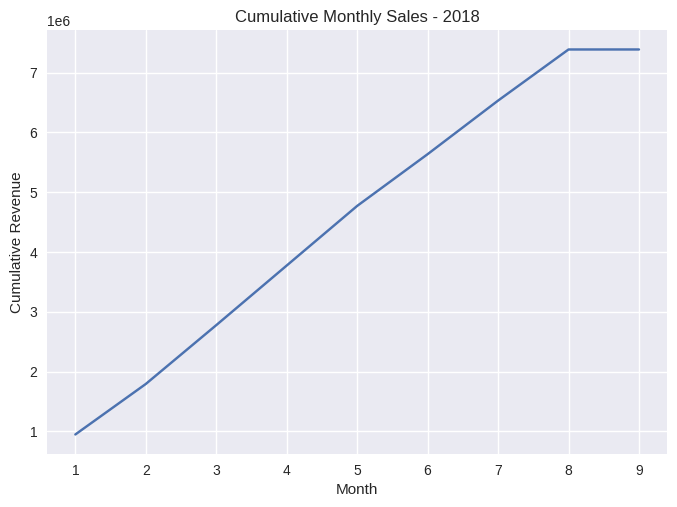

In [25]:
orders_items = orders.merge(order_items, on='order_id', how='inner')

orders_items['year'] = orders_items['order_purchase_timestamp'].dt.year
orders_items['month'] = orders_items['order_purchase_timestamp'].dt.month

monthly_sales = orders_items.groupby(['year', 'month'])['price'].sum().reset_index()

monthly_sales['cumulative_sales'] = monthly_sales.groupby('year')['price'].cumsum()

for y in monthly_sales['year'].unique():
    df_year = monthly_sales[monthly_sales['year'] == y]
    plt.figure()
    plt.plot(df_year['month'], df_year['cumulative_sales'])
    plt.title(f'Cumulative Monthly Sales - {y}')
    plt.xlabel('Month')
    plt.ylabel('Cumulative Revenue')
    plt.show()


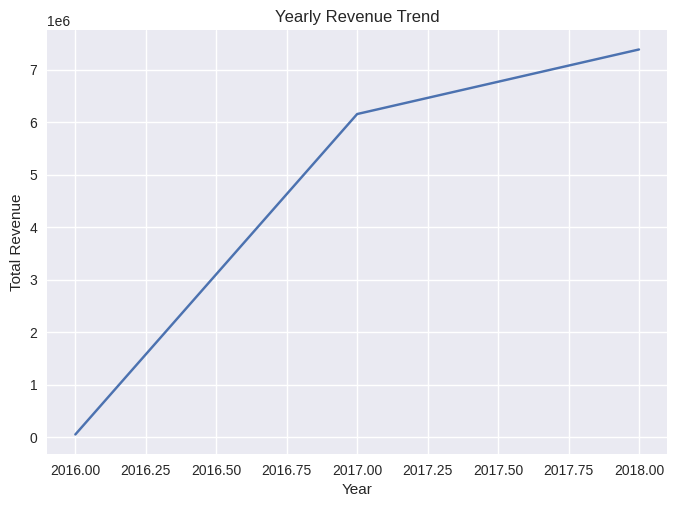

In [26]:
yearly_revenue = orders_items.groupby('year')['price'].sum().reset_index()
yearly_revenue['yoy_growth_%'] = yearly_revenue['price'].pct_change() * 100

plt.figure()
plt.plot(yearly_revenue['year'], yearly_revenue['price'])
plt.title('Yearly Revenue Trend')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.show()

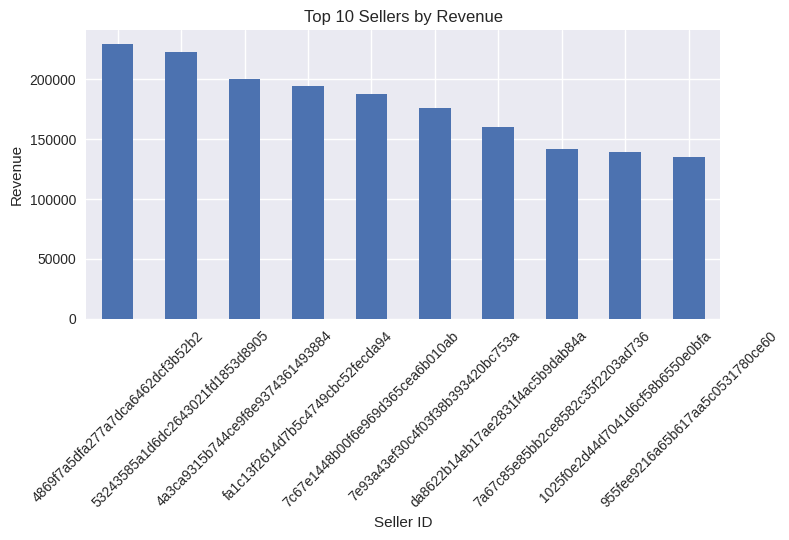

In [27]:
seller_revenue = order_items.merge(sellers, on='seller_id', how='left') \
                            .groupby('seller_id')['price'].sum() \
                            .sort_values(ascending=False).head(10)

plt.figure()
seller_revenue.plot(kind='bar')
plt.title('Top 10 Sellers by Revenue')
plt.xlabel('Seller ID')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [28]:
product_stats = order_items.groupby('product_id').agg(
    avg_price=('price', 'mean'),
    purchase_count=('order_id', 'count')
).reset_index()

correlation = product_stats[['avg_price', 'purchase_count']].corr()
correlation


,avg_price,purchase_count
avg_price,1.00000,-0.03214
purchase_count,-0.03214,1.00000


# Print key metrics

In [29]:
print(f"Unique Cities: {unique_cities}")
print(f"2017 Order Count: {orders_2017}")
print(f"Installment Payment Percentage: {pct_installments:.2f}%")
print(f"Price vs Popularity Correlation: {correlation.iloc[0,1]:.4f}")

Unique Cities: ['abadia dos dourados' 'abadiania' 'abaete' ... 'zacarias' 'ze doca'
 'zortea']
2017 Order Count: 45101
Installment Payment Percentage: 49.42%
Price vs Popularity Correlation: -0.0321
